In [1]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_excel("Copaxone_Trx_Edited.xlsx", index_col = 'Dates', parse_dates = True)

In [4]:
print('Shape of data',df.shape)
df.head()

Shape of data (72, 1)


,Copaxone_TRx
Dates,
2015-11-01,55743
2015-11-02,60787
2015-11-03,51570
2015-11-04,55726
2015-11-05,62638


<AxesSubplot:xlabel='Dates'>

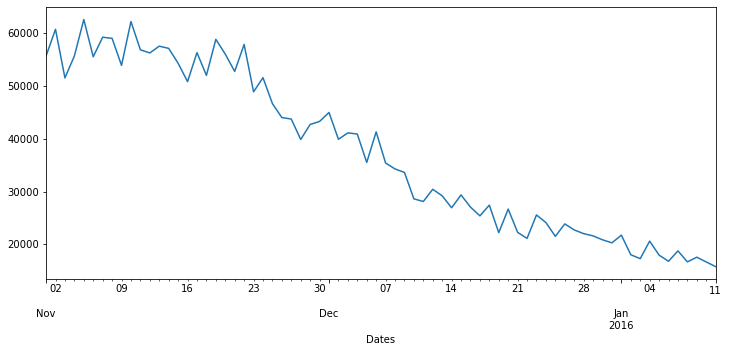

In [5]:
df['Copaxone_TRx'].plot(figsize=(12,5))

In [6]:
from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF : ",dftest[0])
  print("2. P-Value : ", dftest[1])
  print("3. Num Of Lags : ", dftest[2])
  print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
  print("5. Critical Values :")
  for key, val in dftest[4].items():
      print("\t",key, ": ", val)

In [7]:
adf_test(df['Copaxone_TRx'])

1. ADF :  -1.2682566613019115
2. P-Value :  0.6435669578165728
3. Num Of Lags :  12
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 59
5. Critical Values :
	 1% :  -3.5463945337644063
	 5% :  -2.911939409384601
	 10% :  -2.5936515282964665


In [8]:
from pmdarima import auto_arima
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [9]:
stepwise_fit = auto_arima(df['Copaxone_TRx'], suppress_warnings=True)           

stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   72
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -685.291
Date:                Fri, 14 Jan 2022   AIC                           1372.582
Time:                        14:50:35   BIC                           1374.845
Sample:                             0   HQIC                          1373.482
                                 - 72                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.396e+07    2.5e+06      5.576      0.000    9.06e+06    1.89e+07
===================================================================================
Ljung-Box (L1) (Q):                  24.69   Jarque-Bera (JB):                 0.33
Prob(Q):                              0.00   Prob(JB):                         0.85
Heteroskedasticity (H):               0.24   Skew:                             0.12
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [10]:
from statsmodels.tsa.arima_model import ARIMA

In [11]:
print(df.shape)
train = df.iloc[:-24]
test = df.iloc[-24:]
print(train.shape,test.shape)
print(test.iloc[0], test.iloc[-1])

(72, 1)
(48, 1) (24, 1)
Copaxone_TRx    22221
Name: 2015-12-19 00:00:00, dtype: int64 Copaxone_TRx    15771
Name: 2016-01-11 00:00:00, dtype: int64


In [12]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(train['Copaxone_TRx'], order = (2,0,5))
model = model.fit()
#model.summary()

In [13]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(train['Copaxone_TRx'], order = (1,1,4))
model = model.fit()
#model.summary()

In [18]:
df.tail()

,Copaxone_TRx
Dates,
2016-01-07,18764
2016-01-08,16674
2016-01-09,17565
2016-01-10,16661
2016-01-11,15771


<AxesSubplot:xlabel='Dates'>

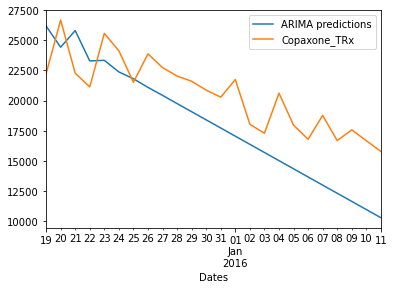

In [19]:
start = len(train)
end = len(train)+len(test)-1
#if the predicted values dont have date values as index, you will have to uncomment the following two commented lines to plot a graph
index_future_dates = pd.date_range(start = '2016-01-12', end = '2016-02-04')
pred = model.predict(start = start, end = end, typ = 'levels').rename('ARIMA predictions')
#pred.index=index_future_dates
pred.plot(legend = True)
test['Copaxone_TRx'].plot(legend=True)

In [20]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred, test['Copaxone_TRx']))
print(rmse)

3631.9160629351395


In [21]:
model2 = ARIMA(df['Copaxone_TRx'], order=(1,0,5))
model2=model2.fit()

In [22]:
pred = model2.predict(start =len(df), end = len(df) + 23, typ = 'levels').rename('ARIMA Predictions')
#print(comp_pred)
pred.index = index_future_dates
print(pred)

2016-01-12    17067.202996
2016-01-13    15688.526939
2016-01-14    15979.354506
2016-01-15    16120.761468
2016-01-16    15920.876263
2016-01-17    15897.669440
2016-01-18    15874.474444
2016-01-19    15851.291269
2016-01-20    15828.119909
2016-01-21    15804.960359
2016-01-22    15781.812612
2016-01-23    15758.676661
2016-01-24    15735.552502
2016-01-25    15712.440128
2016-01-26    15689.339534
2016-01-27    15666.250712
2016-01-28    15643.173657
2016-01-29    15620.108364
2016-01-30    15597.054826
2016-01-31    15574.013036
2016-02-01    15550.982990
2016-02-02    15527.964681
2016-02-03    15504.958104
2016-02-04    15481.963251
Freq: D, Name: ARIMA Predictions, dtype: float64


In [434]:
index_future_dates = pd.date_range(start = '2016-01-12', end = '2016-02-04')
print(index_future_dates)

DatetimeIndex(['2016-01-12', '2016-01-13', '2016-01-14', '2016-01-15',
               '2016-01-16', '2016-01-17', '2016-01-18', '2016-01-19',
               '2016-01-20', '2016-01-21', '2016-01-22', '2016-01-23',
               '2016-01-24', '2016-01-25', '2016-01-26', '2016-01-27',
               '2016-01-28', '2016-01-29', '2016-01-30', '2016-01-31',
               '2016-02-01', '2016-02-02', '2016-02-03', '2016-02-04'],
              dtype='datetime64[ns]', freq='D')


In [360]:
model3 = ARIMA(df['Copaxone_TRx'], order=(1,0,8))
model3 = model3.fit()
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
pred = model3.predict(start =len(df), end = len(df) + 23, typ = 'levels').rename('ARIMA Predictions')
#print(comp_pred)
pred.index = index_future_dates
print(pred)

2016-01-12    16676.705470
2016-01-13    15758.329465
2016-01-14    13114.021077
2016-01-15    15179.177026
2016-01-16    13417.344396
2016-01-17    11493.075656
2016-01-18    13538.279607
2016-01-19    11080.508350
2016-01-20     9985.197722
2016-01-21    11736.800813
2016-01-22     8796.781060
2016-01-23     8549.907447
2016-01-24     9773.894625
2016-01-25     6607.153306
2016-01-26     7139.910582
2016-01-27     7664.590308
2016-01-28     4540.708784
2016-01-29     5706.207740
2016-01-30     5437.684429
2016-01-31     2612.050837
2016-02-01     4203.198711
2016-02-02     3132.290123
2016-02-03      820.310728
2016-02-04     2593.256537
Freq: D, Name: ARIMA Predictions, dtype: float64


<AxesSubplot:>

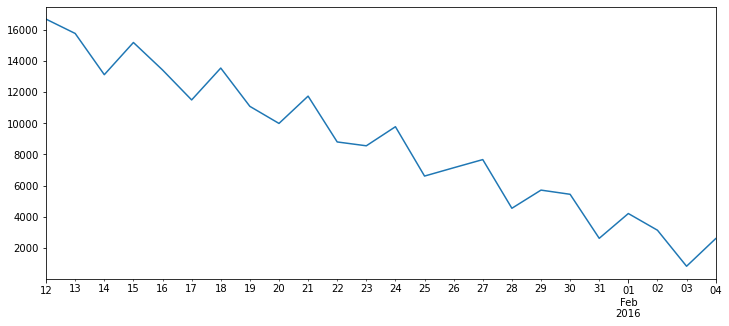

In [415]:
model3 = ARIMA(df['Copaxone_TRx'], order=(2,2,4)) #2,0,7 #2,0,5
model3 = model3.fit()
pred = model3.predict(start =len(df), end = len(df) + 23, typ = 'levels').rename('ARIMA Predictions')
#print(comp_pred)
pred.index = index_future_dates
print(pred)
pred.plot(figsize=(12,5))

<AxesSubplot:xlabel='Dates'>

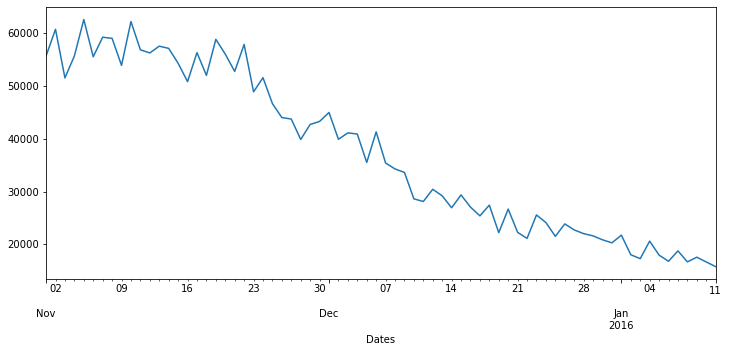

In [362]:
df['Copaxone_TRx'].plot(figsize=(12,5))

In [416]:
df_predicted = pd.read_excel("Copaxone_Trx_Edited_with_Prediction.xlsx", index_col = 'Dates', parse_dates = True)

<AxesSubplot:xlabel='Dates'>

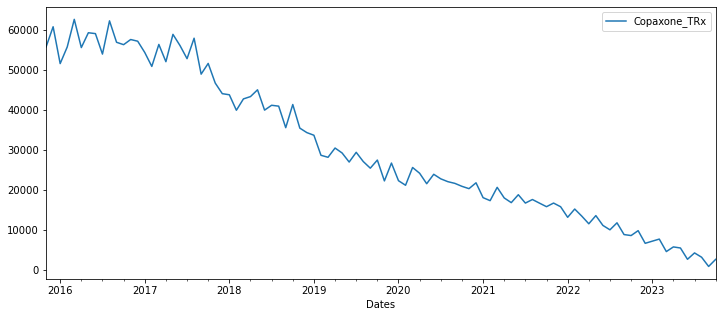

In [417]:
df_predicted.plot(figsize=(12,5))

In [138]:
p_values = range(0, 6)
d_values = range(0, 4)
q_values = range(0, 8)

In [139]:
import warnings
warnings.filterwarnings("ignore")

In [141]:
for p in p_values:
    for d in d_values:
        for q in q_values:
            order = (p, d, q)
            train, test =  df[0:48], df[48:73]
            predictions = list()
            for i in range(len(test)):
                try:
                    model = ARIMA(train, order)
                    model_fit = model.fit(disp = 0)
                    pred_y = model_fit.forecast()[0]
                    predictions.append(pred_y)
                    error = mean_squared_error(test, predcitions)
                    print('ARIMA%s MSE = %.2f'% (order, error))
                except:
                    continue